<a href="https://colab.research.google.com/github/RAJATkumarp/CatvsDogClassifier/blob/main/animalclassificationCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:09<00:00, 220MB/s]
100% 1.06G/1.06G [00:10<00:00, 114MB/s]


In [ ]:
!mkdir -p ./Dogs-vs-Cats
!unzip dogs-vs-cats.zip -d ./Dogs-vs-Cats

Streaming output truncated to the last 5000 lines.
  inflating: ./Dogs-vs-Cats/train/dogs/dog.4419.jpg  
  inflating: ./Dogs-vs-Cats/train/dogs/dog.442.jpg  
  inflating: ./Dogs-vs-Cats/train/dogs/dog.4420.jpg  
  inflating: ./Dogs-vs-Cats/train/dogs/dog.4421.jpg  
  inflating: ./Dogs-vs-Cats/train/dogs/dog.4422.jpg  
  inflating: ./Dogs-vs-Cats/train/dogs/dog.4424.jpg  
  inflating: ./Dogs-vs-Cats/train/dogs/dog.4425.jpg  
  inflating: ./Dogs-vs-Cats/train/dogs/dog.4426.jpg  
  inflating: ./Dogs-vs-Cats/train/dogs/dog.4427.jpg  
  inflating: ./Dogs-vs-Cats/train/dogs/dog.4431.jpg  
  inflating: ./Dogs-vs-Cats/train/dogs/dog.4433.jpg  
  inflating: ./Dogs-vs-Cats/train/dogs/dog.4436.jpg  
  inflating: ./Dogs-vs-Cats/train/dogs/dog.4438.jpg  
  inflating: ./Dogs-vs-Cats/train/dogs/dog.4439.jpg  
  inflating: ./Dogs-vs-Cats/train/dogs/dog.444.jpg  
  inflating: ./Dogs-vs-Cats/train/dogs/dog.4440.jpg  
  inflating: ./Dogs-vs-Cats/train/dogs/dog.4441.jpg  
  inflating: ./Dogs-vs-Cats/train

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/Dogs-vs-Cats/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/Dogs-vs-Cats/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
#create CNN model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 75ms/step - accuracy: 0.5342 - loss: 0.7051 - val_accuracy: 0.6724 - val_loss: 0.6237
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.6837 - loss: 0.5909 - val_accuracy: 0.7656 - val_loss: 0.4929
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.7936 - loss: 0.4381 - val_accuracy: 0.7832 - val_loss: 0.5147
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - accuracy: 0.8765 - loss: 0.2873 - val_accuracy: 0.7800 - val_loss: 0.7011
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 78ms/step - accuracy: 0.9442 - loss: 0.1434 - val_accuracy: 0.7770 - val_loss: 0.9489
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 73ms/step - accuracy: 0.9737 - loss: 0.0749 - val_accuracy: 0.7864 - val_loss: 1.1502
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.9816 - loss: 0.0529 - val_accuracy: 0.7838 - val_loss: 1.2465
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - accuracy: 0.9853 - loss: 0.0446 - 

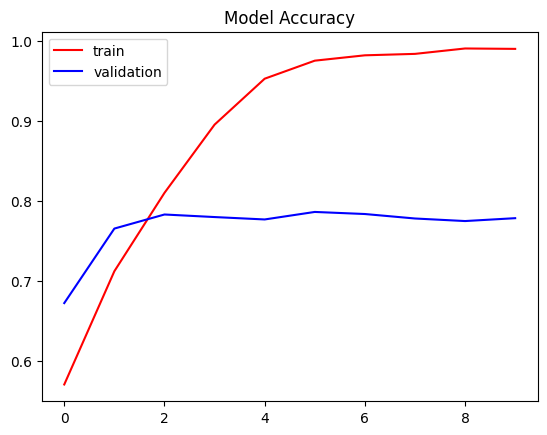

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title('Model Accuracy')
plt.legend()
plt.show()